## Project "Write a Blog"

In this project, I will explore the "Credit Card customers" dataset from Kaggle.\
The data is available here:\
https://www.kaggle.com/sakshigoyal7/credit-card-customers/version/1

The questions I would like to explore in this blog are:
1. Exploratory data - get an understanding of the data 
2. Predict how much credit limit a user will get
3. Predict which card category user will get

And now without further ado - let's begin!

## 1. Exploratory data - get an understanding of the data

In [1]:
# Importing packages and reading the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

df = pd.read_csv('./BankChurners.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [2]:
# remove unused columns

df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, errors='ignore')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# Get basic statistics
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


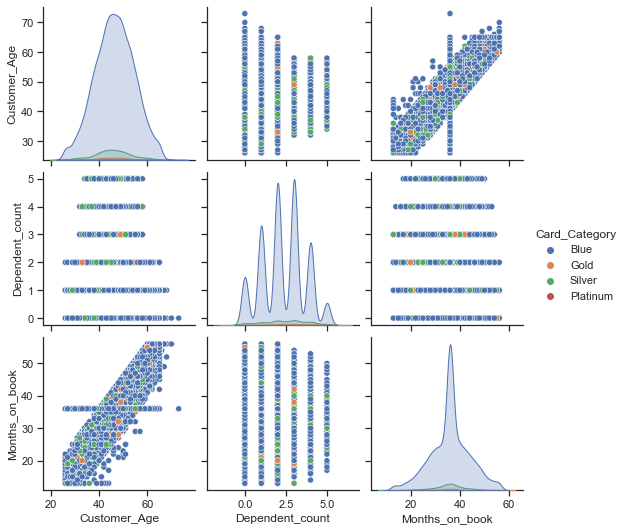

In [4]:
sns.set_theme(style="ticks")
df_new = df[['Customer_Age','Dependent_count','Months_on_book','Card_Category']]
sns.pairplot(df_new, hue='Card_Category')

In [5]:
# sns.set_theme(style="ticks")
# df_new2 = df.select_dtypes('number')
# # sns.pairplot(df_new2)
# sns.pairplot(df_new2)

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>]], dtype=object)

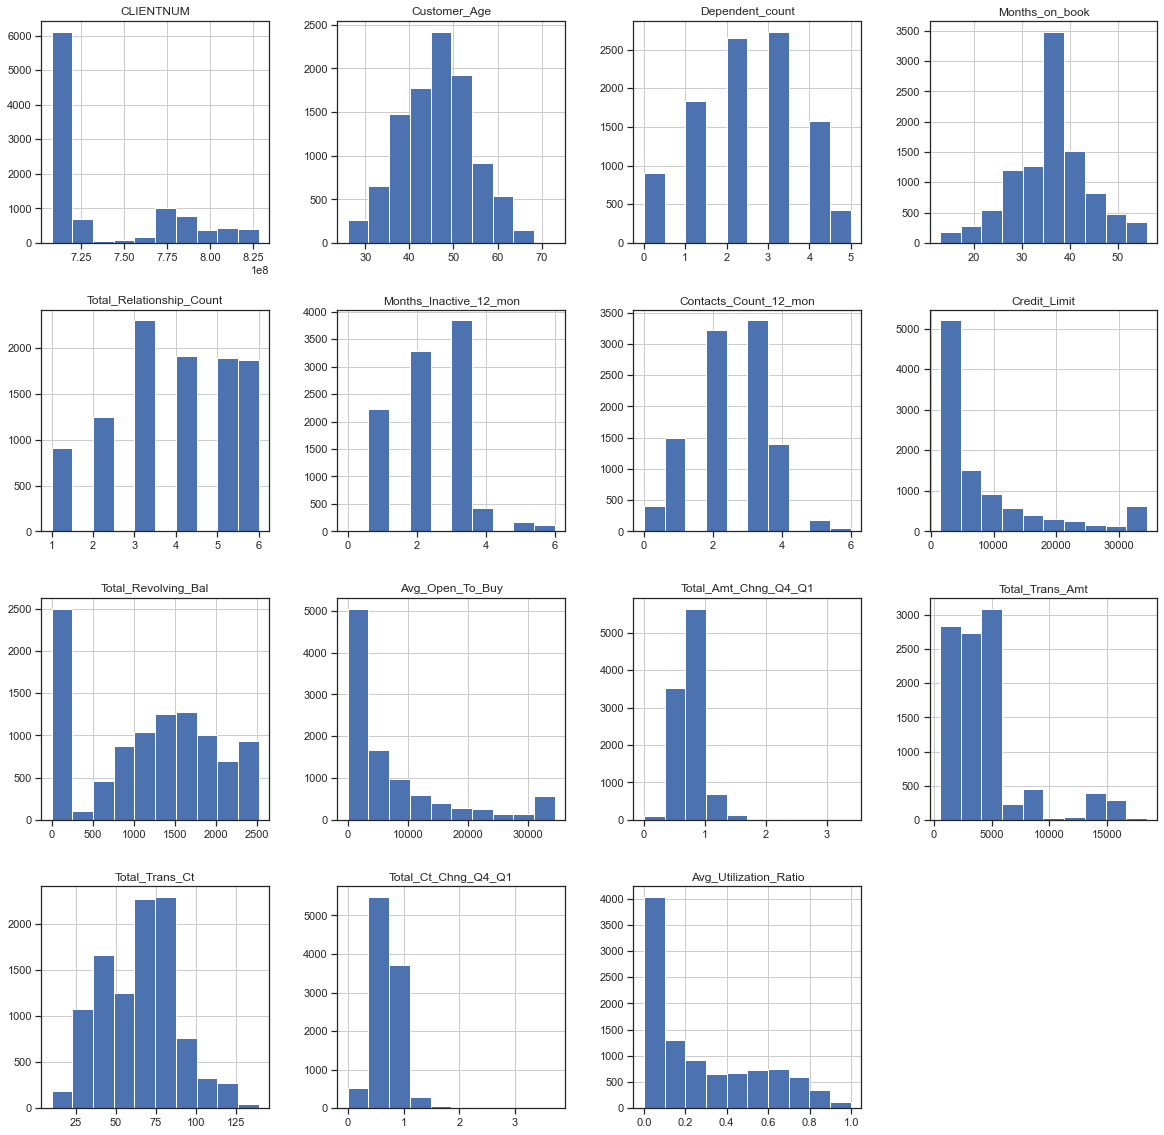

In [6]:
df.hist(figsize=(20,20))

<AxesSubplot:>

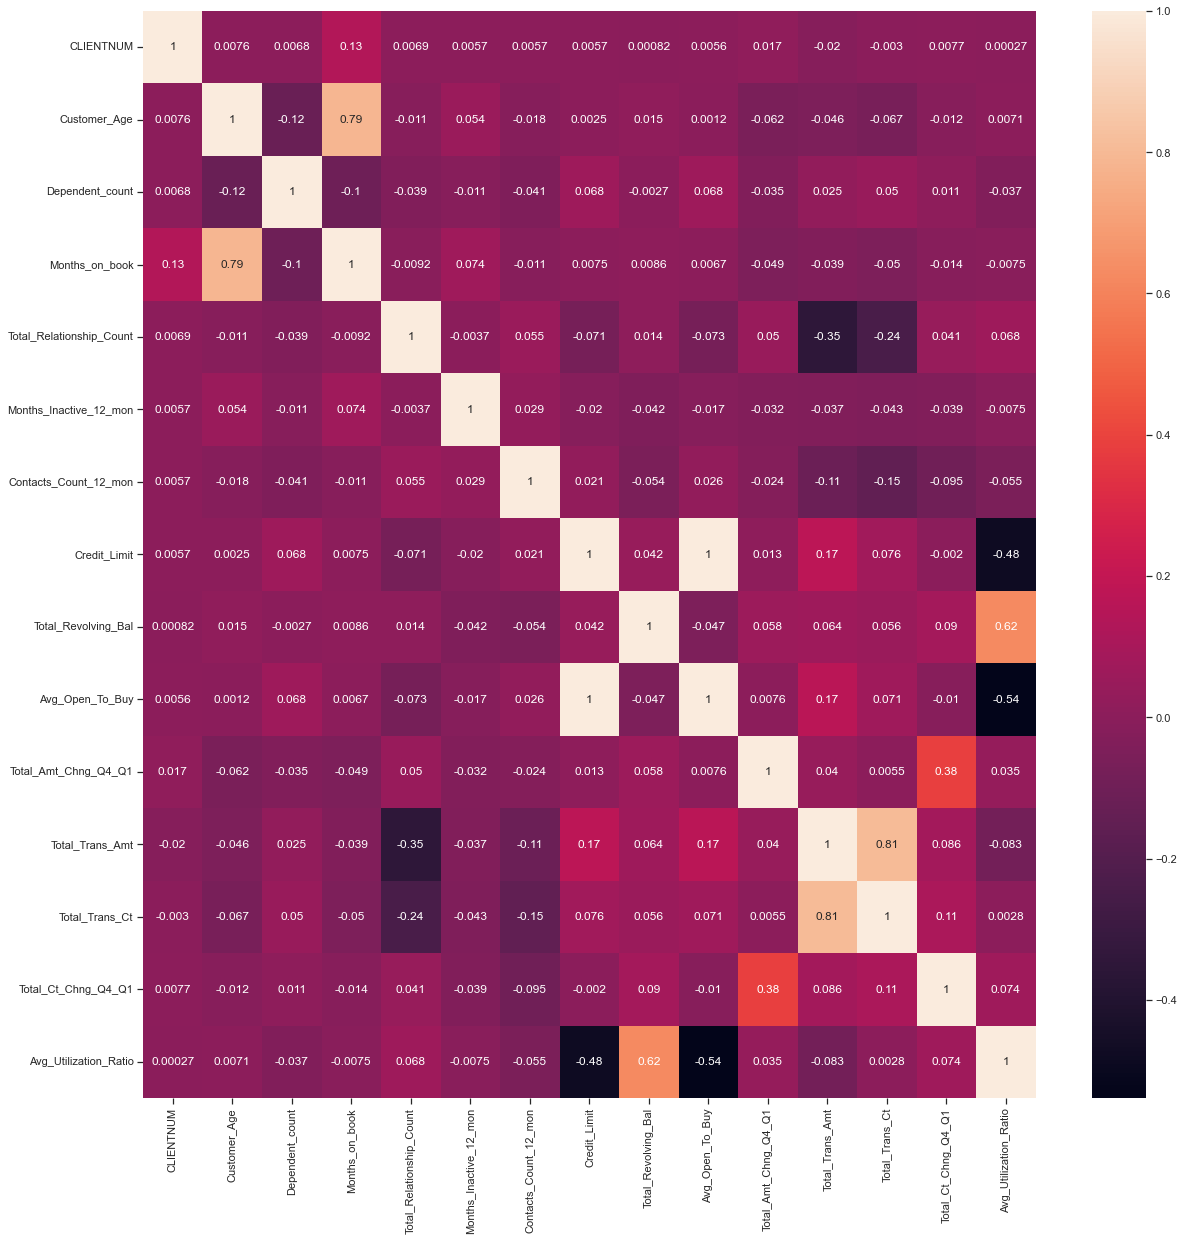

In [7]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True)

## 2. Predict how much credit limit a user will get

In [8]:
# Understand the values in the Credit limit columns
df['Credit_Limit'].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

array([[<AxesSubplot:title={'center':'Credit_Limit'}>]], dtype=object)

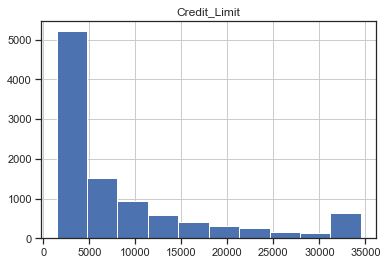

In [9]:
df.hist('Credit_Limit')

In [10]:
df = df.drop(['Total_Revolving_Bal', 'Avg_Open_To_Buy'], axis=1, errors='ignore')


In [11]:
# Prepare data for model
#     1. Drop all the rows with no Credit_Limit
#     2. Create X as all the columns that are not the Credit_Limit column
#     3. Create y as the Credit_Limit column
#     4. Drop the Credit_Limit columns from X
#     5. For each numeric variable in X, fill the column with the mean value of the column.
#     6. Create dummy columns for all the categorical variables in X, drop the original columns

df_formodel1 = df.dropna(subset=['Credit_Limit'], axis=0)
y = df['Credit_Limit']
X = df.drop(['Credit_Limit'], axis=1)

# Fill numeric columns with the mean
num_vars = X.select_dtypes(include=['number']).columns
for col in num_vars:
    X[col].fillna(X[col].mean(), inplace=True)
    
# Dummy the categorical variables
cat_vars = X.select_dtypes(include='object').copy().columns
for var in cat_vars:
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
X

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,3,39,5,1,3,1.335,1144,42,...,0,0,0,1,0,0,0,0,0,0
1,818770008,49,5,44,6,1,2,1.541,1291,33,...,1,0,0,0,0,1,0,0,0,0
2,713982108,51,3,36,4,1,0,2.594,1887,20,...,0,0,0,0,1,0,0,0,0,0
3,769911858,40,4,34,3,4,1,1.405,1171,20,...,0,1,0,0,0,1,0,0,0,0
4,709106358,40,3,21,5,1,0,2.175,816,28,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,0.703,15476,117,...,1,0,1,0,0,0,0,0,0,0
10123,710638233,41,2,25,4,2,3,0.804,8764,69,...,0,0,1,0,0,0,0,0,0,0
10124,716506083,44,1,36,5,3,4,0.819,10291,60,...,0,0,0,0,0,1,0,0,0,0
10125,717406983,30,2,36,4,3,3,0.535,8395,62,...,0,1,1,0,0,0,0,0,0,0


In [12]:
#  Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [23]:
# Instaniate
lm_model = lm_model = LinearRegression(normalize=True)

# Fit
lm_model.fit(X_train, y_train)

# Predit
y_test_pred = lm_model.predict(X_test)

# R-squared and y_test
"The R square is {}".format(r2_score(y_test,y_test_pred))

'The R square is 0.601459883602621'

In [24]:
mean_squared_error(y_test,y_test_pred)

30342144.483288057

In [25]:
mean_squared_error(y_test,y_test_pred, squared=False)

5508.3704017874525

In [26]:
y.describe()

count   10,127.0000000000
mean     8,631.9536980348
std      9,088.7766502231
min      1,438.3000000000
25%      2,555.0000000000
50%      4,549.0000000000
75%     11,067.5000000000
max     34,516.0000000000
Name: Credit_Limit, dtype: float64

In [17]:
pd.options.display.float_format = '{:,.10f}'.format
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

,est_int,coefs,abs_coefs
29,Card_Category_Platinum,"18,306.6850758454","18,306.6850758454"
28,Card_Category_Gold,"16,643.9671431410","16,643.9671431410"
30,Card_Category_Silver,"14,442.1735048055","14,442.1735048055"
26,Income_Category_Less than $40K,"-12,611.1968071958","12,611.1968071958"
23,Income_Category_$40K - $60K,"-11,981.6437853230","11,981.6437853230"
11,Avg_Utilization_Ratio,"-8,376.4174663421","8,376.4174663421"
24,Income_Category_$60K - $80K,"-8,321.6345243020","8,321.6345243020"
27,Income_Category_Unknown,"-8,286.3484973526","8,286.3484973526"
25,Income_Category_$80K - $120K,"-3,542.4251884390","3,542.4251884390"
12,Attrition_Flag_Existing Customer,"2,123.3410400925","2,123.3410400925"


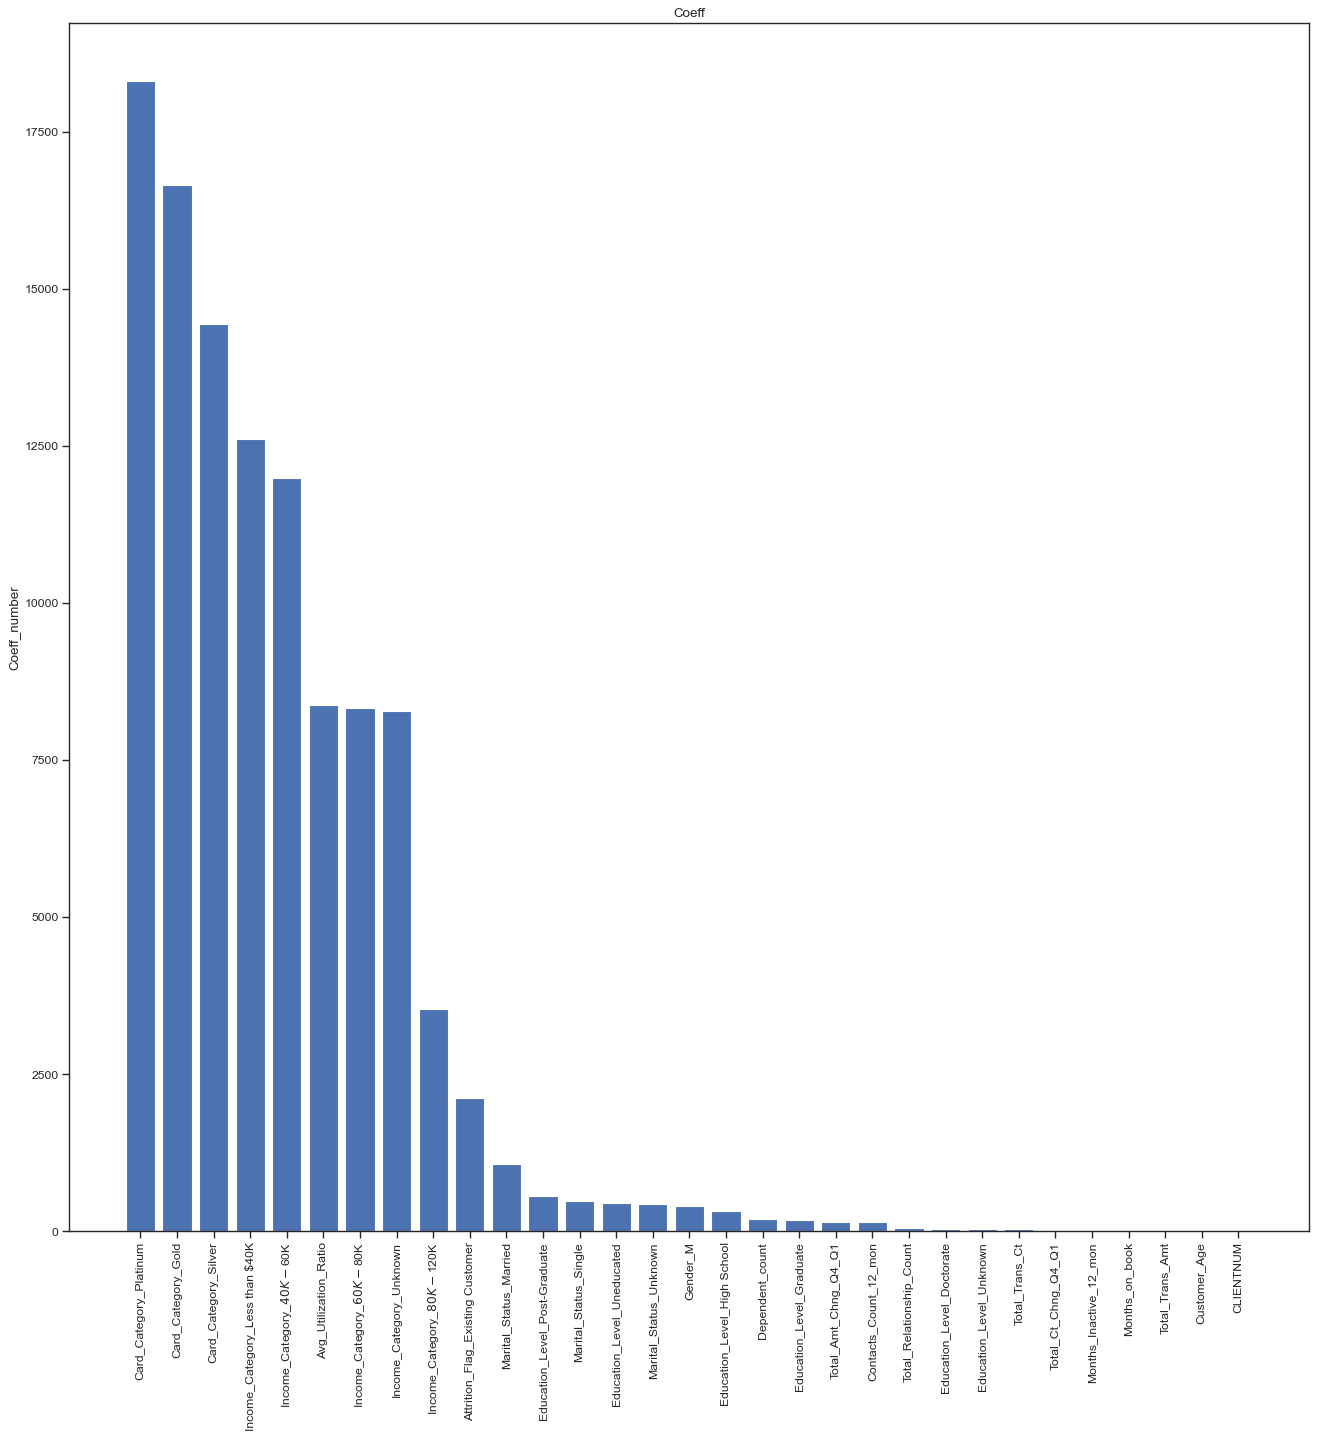

In [18]:
from matplotlib.pyplot import figure

objects = (coefs_df['est_int'])
y_pos = np.arange(len(objects))
performance = abs(coefs_df['abs_coefs'])

figure(figsize=(20, 20), dpi=80)
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(rotation = 90)
plt.xticks(y_pos, objects)
plt.ylabel('Coeff_number')
plt.title('Coeff')

plt.show()

## 3. Predict which card category user will get

In [19]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [27]:
# Prepare data for model
#     1. Drop all the rows with no Credit_Limit
#     2. Create X as all the columns that are not the Credit_Limit column
#     3. Create y as the Credit_Limit column
#     4. Drop the Credit_Limit columns from X
#     5. For each numeric variable in X, fill the column with the mean value of the column.
#     6. Create dummy columns for all the categorical variables in X, drop the original columns

df_formodel2 = df.dropna(subset=['Card_Category'], axis=0)
y = df['Card_Category']
X = df.drop(['Card_Category'], axis=1)

# Fill numeric columns with the mean
num_vars = X.select_dtypes(include=['number']).columns
for col in num_vars:
    X[col].fillna(X[col].mean(), inplace=True)
    
# Dummy the categorical variables
cat_vars = X.select_dtypes(include='object').copy().columns
for var in cat_vars:
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
X

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,768805383,45,3,39,5,1,3,"12,691.0000000000",1.3350000000,1144,...,0,0,1,0,0,0,1,0,0,0
1,818770008,49,5,44,6,1,2,"8,256.0000000000",1.5410000000,1291,...,0,0,0,1,0,0,0,0,1,0
2,713982108,51,3,36,4,1,0,"3,418.0000000000",2.5940000000,1887,...,0,0,1,0,0,0,0,1,0,0
3,769911858,40,4,34,3,4,1,"3,313.0000000000",1.4050000000,1171,...,0,0,0,0,1,0,0,0,1,0
4,709106358,40,3,21,5,1,0,"4,716.0000000000",2.1750000000,816,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,"4,003.0000000000",0.7030000000,15476,...,0,0,0,1,0,1,0,0,0,0
10123,710638233,41,2,25,4,2,3,"4,277.0000000000",0.8040000000,8764,...,0,1,0,0,0,1,0,0,0,0
10124,716506083,44,1,36,5,3,4,"5,409.0000000000",0.8190000000,10291,...,0,0,1,0,0,0,0,0,1,0
10125,717406983,30,2,36,4,3,3,"5,281.0000000000",0.5350000000,8395,...,0,0,0,0,1,1,0,0,0,0


In [31]:

#  Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

# Instaniate
lr_model = lr_model = LogisticRegression()

# Fit
lr_model.fit(X_train, y_train)

# Predit
y_test_pred = lr_model.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred, normalize=True)


0.928923988153998

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[2823,    0,    0,    0],
       [  33,    0,    0,    0],
       [   5,    0,    0,    0],
       [ 178,    0,    0,    0]], dtype=int64)